# Concrete Strength Prediction using Artificial Neural Network

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [8]:
conc_df = pd.read_excel(r"D:\001_Data\Completed\Python Projects\Concrete Dataset\Concrete_Data.xls")

## 1. Importing data & data quality checks

In [9]:
conc_df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [10]:
conc_df.tail()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [11]:
conc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age                             1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [121]:
conc_df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [122]:
conc_df.shape

(1030, 9)

In [15]:
conc_df.isnull().sum()

Cement                            0
Blast Furnace Slag                0
Fly Ash                           0
Water                             0
Superplasticizer                  0
Coarse Aggregate                  0
Fine Aggregate                    0
Age                               0
Concrete compressive strength     0
dtype: int64

## 2. Data Visualization

Text(0, 0.5, 'Count')

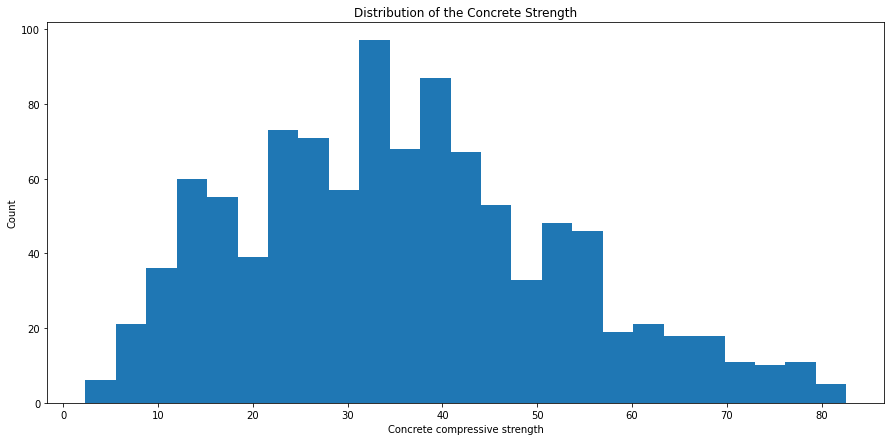

In [16]:
plt.figure(figsize=(15,7))
plt.hist(conc_df["Concrete compressive strength "], bins=25)
plt.title("Distribution of the Concrete Strength")
plt.xlabel("Concrete compressive strength")
plt.ylabel("Count")

Text(0.5, 1.0, 'Correlation Heatmap')

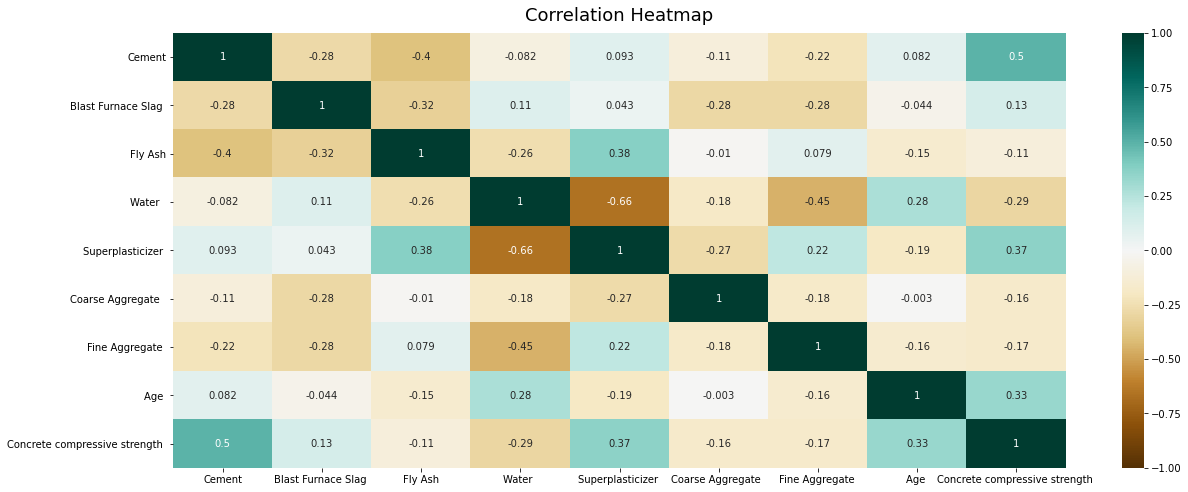

In [17]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(conc_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

Text(0, 0.5, 'Count')

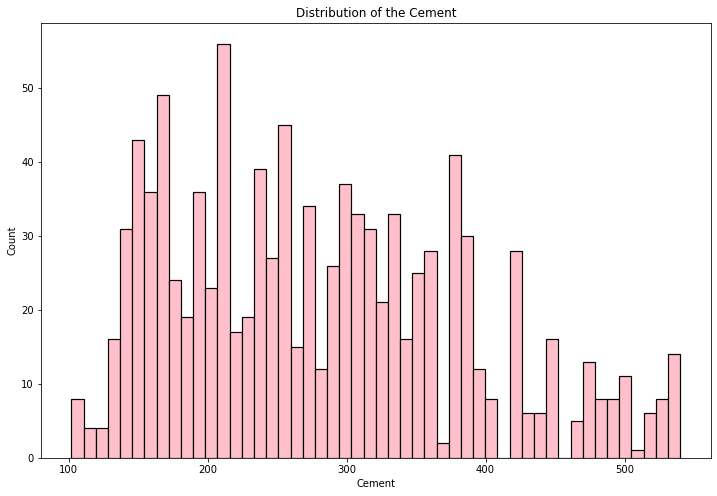

In [18]:
plt.figure(figsize=(12,8))
plt.hist(conc_df["Cement"], bins=50, color='pink', edgecolor='black', linewidth=1.2)
plt.title("Distribution of the Cement")
plt.xlabel("Cement")
plt.ylabel("Count")

Text(0, 0.5, 'Concrete Strength')

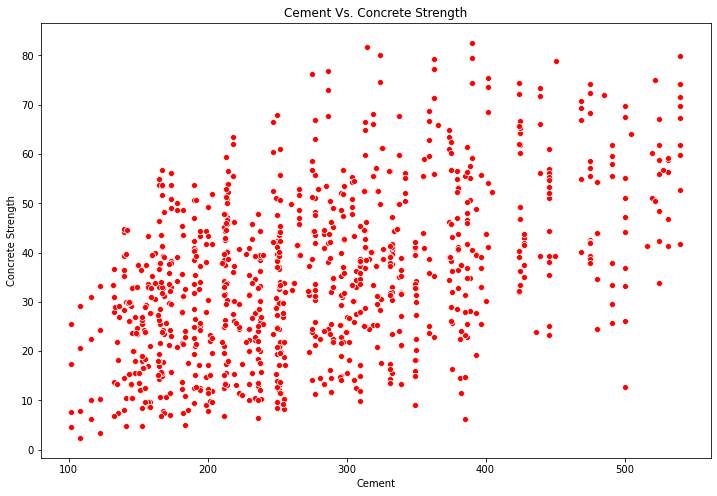

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Cement", y="Concrete compressive strength ", data=conc_df, color="red")
plt.title("Cement Vs. Concrete Strength")
plt.xlabel("Cement")
plt.ylabel("Concrete Strength")

Text(0, 0.5, 'Count')

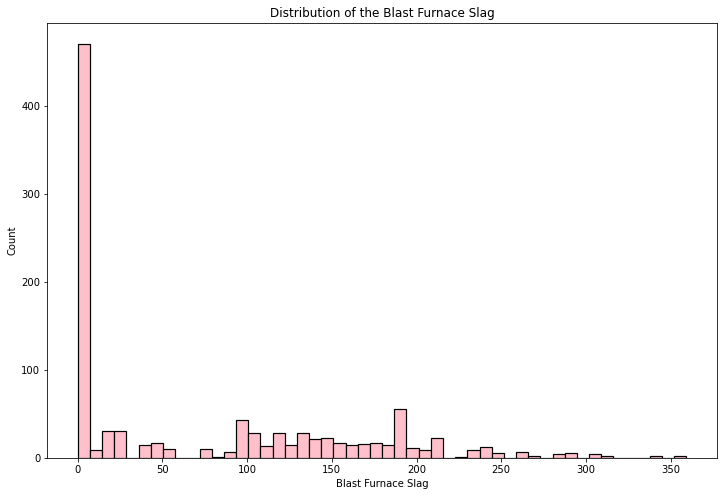

In [20]:
plt.figure(figsize=(12,8))
plt.hist(conc_df["Blast Furnace Slag "], bins=50, color='pink', edgecolor='black', linewidth=1.2)
plt.title("Distribution of the Blast Furnace Slag")
plt.xlabel("Blast Furnace Slag")
plt.ylabel("Count")

Text(0, 0.5, 'Concrete Strength')

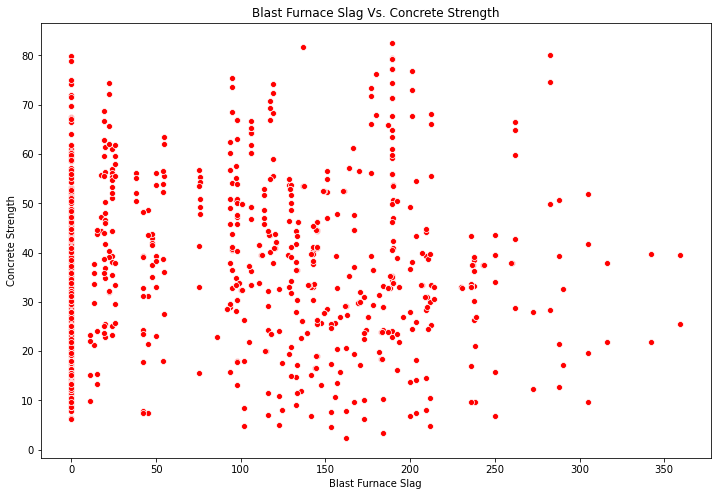

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Blast Furnace Slag ", y="Concrete compressive strength ", data=conc_df, color="red")
plt.title("Blast Furnace Slag Vs. Concrete Strength")
plt.xlabel("Blast Furnace Slag")
plt.ylabel("Concrete Strength")

Text(0, 0.5, 'Count')

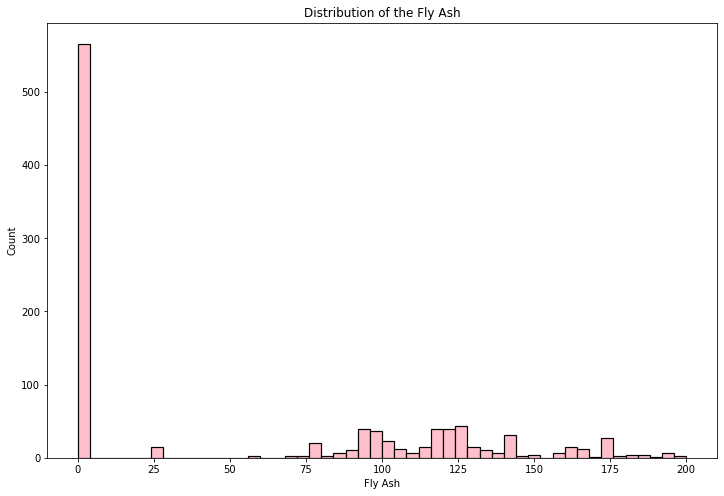

In [22]:
plt.figure(figsize=(12,8))
plt.hist(conc_df["Fly Ash"], bins=50, color='pink', edgecolor='black', linewidth=1.2)
plt.title("Distribution of the Fly Ash")
plt.xlabel("Fly Ash")
plt.ylabel("Count")

Text(0, 0.5, 'Concrete Strength')

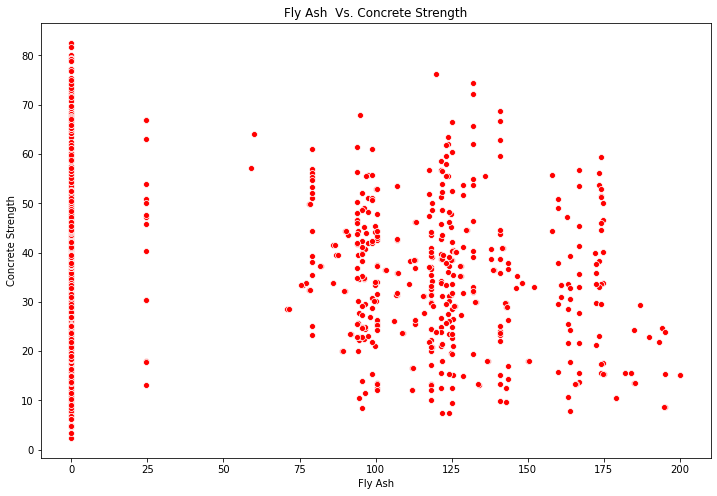

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Fly Ash", y="Concrete compressive strength ", data=conc_df, color="red")
plt.title("Fly Ash  Vs. Concrete Strength")
plt.xlabel("Fly Ash")
plt.ylabel("Concrete Strength")

Text(0, 0.5, 'Count')

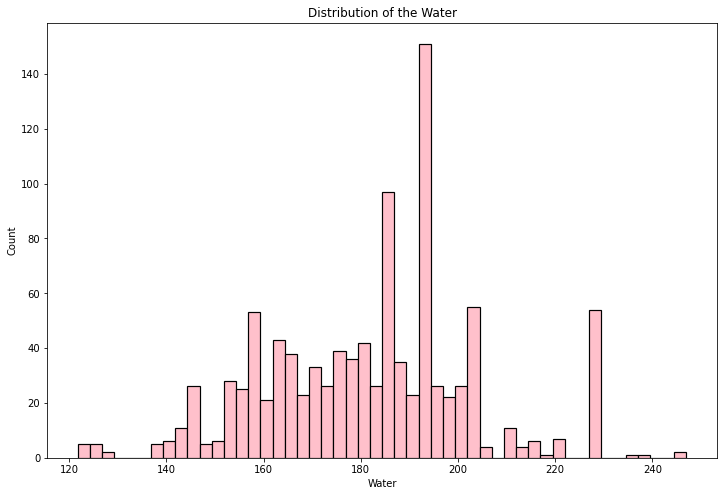

In [24]:
plt.figure(figsize=(12,8))
plt.hist(conc_df["Water  "], bins=50, color='pink', edgecolor='black', linewidth=1.2)
plt.title("Distribution of the Water")
plt.xlabel("Water")
plt.ylabel("Count")

Text(0, 0.5, 'Concrete Strength')

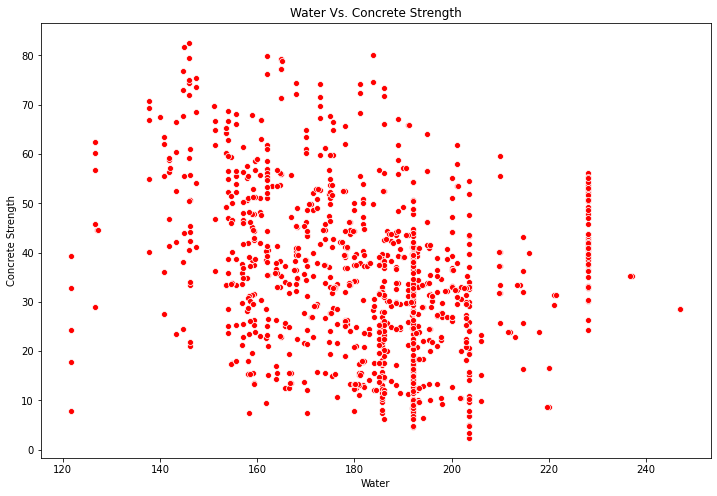

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Water  ", y="Concrete compressive strength ", data=conc_df, color="red")
plt.title("Water Vs. Concrete Strength")
plt.xlabel("Water")
plt.ylabel("Concrete Strength")

Text(0, 0.5, 'Count')

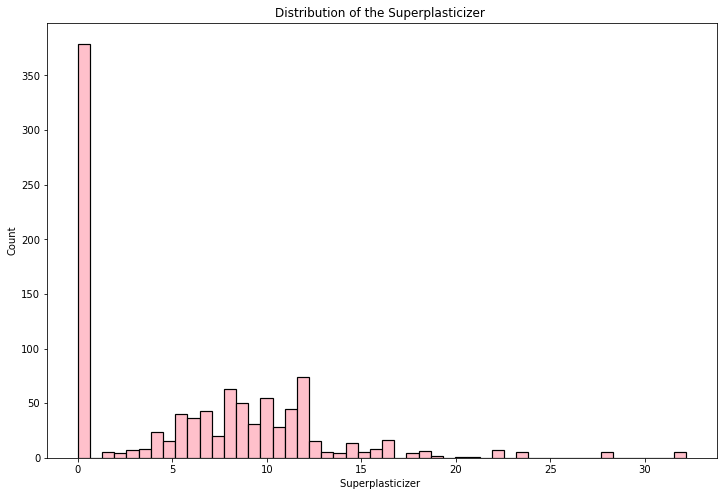

In [26]:
plt.figure(figsize=(12,8))
plt.hist(conc_df["Superplasticizer "], bins=50, color='pink', edgecolor='black', linewidth=1.2)
plt.title("Distribution of the Superplasticizer ")
plt.xlabel("Superplasticizer ")
plt.ylabel("Count")

Text(0, 0.5, 'Concrete Strength')

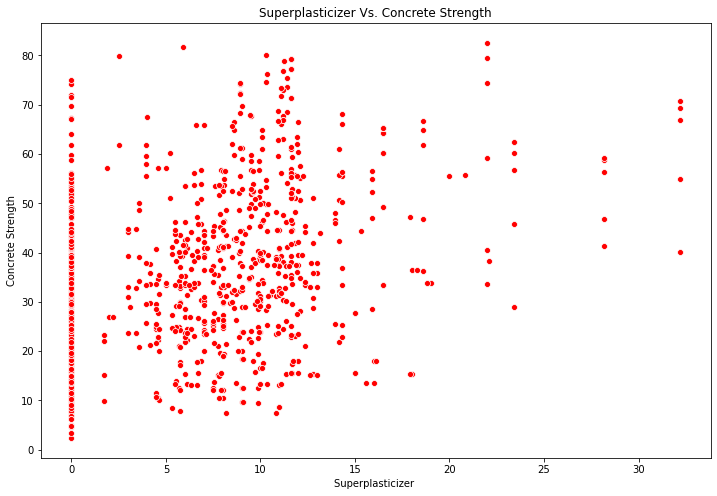

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Superplasticizer ", y="Concrete compressive strength ", data=conc_df, color="red")
plt.title("Superplasticizer Vs. Concrete Strength")
plt.xlabel("Superplasticizer ")
plt.ylabel("Concrete Strength")

Text(0, 0.5, 'Count')

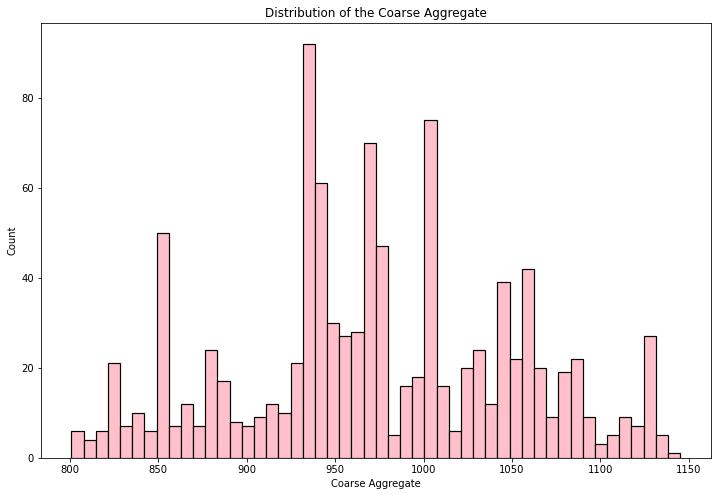

In [28]:
plt.figure(figsize=(12,8))
plt.hist(conc_df["Coarse Aggregate  "], bins=50, color='pink', edgecolor='black', linewidth=1.2)
plt.title("Distribution of the Coarse Aggregate")
plt.xlabel("Coarse Aggregate")
plt.ylabel("Count")

Text(0, 0.5, 'Concrete Strength')

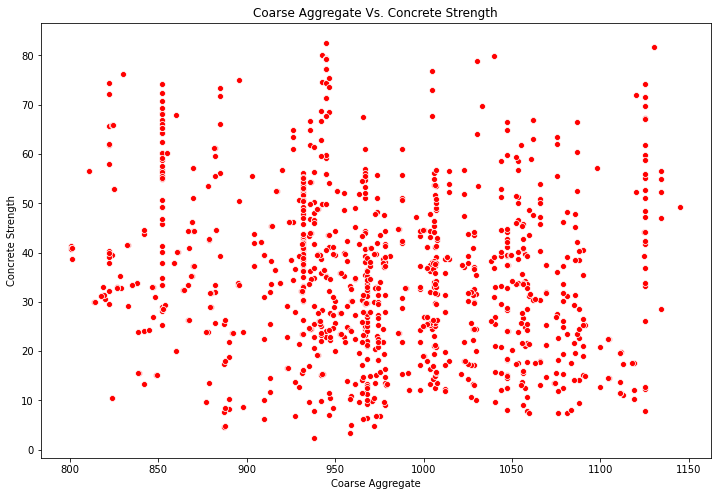

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Coarse Aggregate  ", y="Concrete compressive strength ", data=conc_df, color="red")
plt.title("Coarse Aggregate Vs. Concrete Strength")
plt.xlabel("Coarse Aggregate")
plt.ylabel("Concrete Strength")

Text(0, 0.5, 'Count')

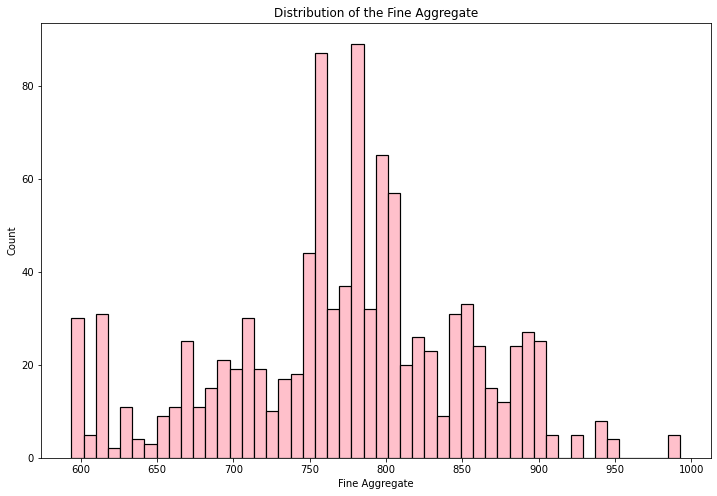

In [30]:
plt.figure(figsize=(12,8))
plt.hist(conc_df["Fine Aggregate "], bins=50, color='pink', edgecolor='black', linewidth=1.2)
plt.title("Distribution of the Fine Aggregate")
plt.xlabel("Fine Aggregate")
plt.ylabel("Count")

Text(0, 0.5, 'Concrete Strength')

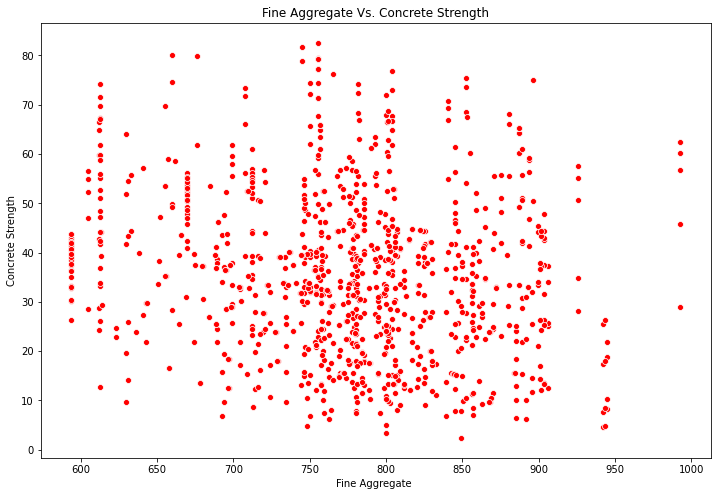

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Fine Aggregate ", y="Concrete compressive strength ", data=conc_df, color="red")
plt.title("Fine Aggregate Vs. Concrete Strength")
plt.xlabel("Fine Aggregate ")
plt.ylabel("Concrete Strength")

Text(0, 0.5, 'Count')

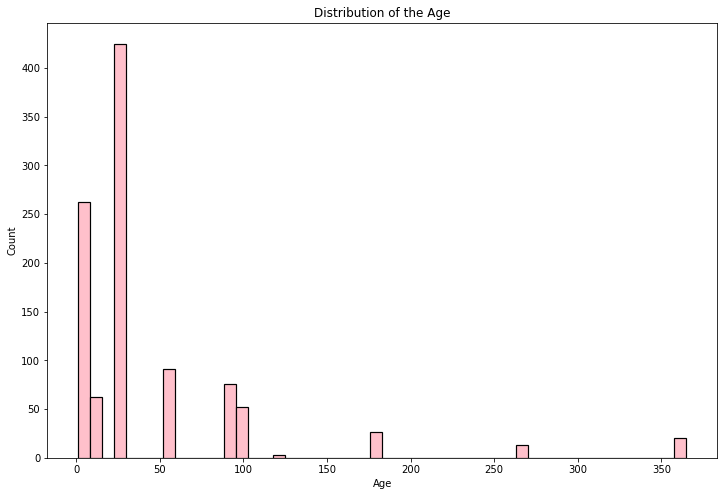

In [32]:
plt.figure(figsize=(12,8))
plt.hist(conc_df["Age "], bins=50, color='pink', edgecolor='black', linewidth=1.2)
plt.title("Distribution of the Age")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0, 0.5, 'Concrete Strength')

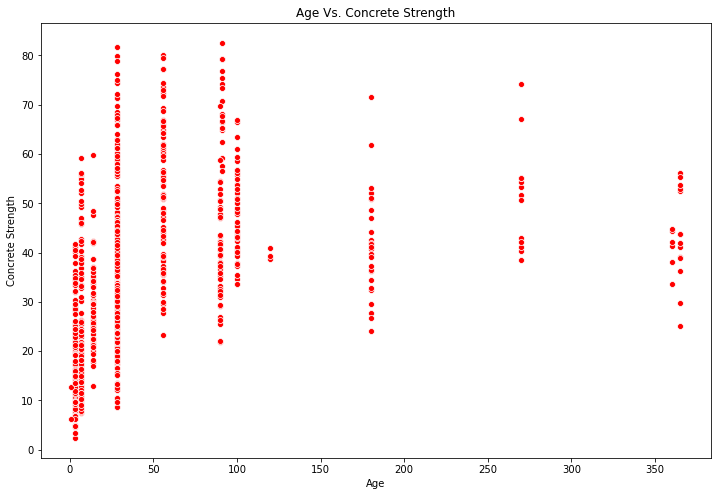

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Age ", y="Concrete compressive strength ", data=conc_df, color="red")
plt.title("Age Vs. Concrete Strength")
plt.xlabel("Age")
plt.ylabel("Concrete Strength")

## 3. Partitioning the dataset and Pre-Processing the data

In [34]:
X = conc_df.drop("Concrete compressive strength ", axis="columns")
y = conc_df["Concrete compressive strength "]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [37]:
print(X_train.shape, X_test.shape)

(721, 8) (309, 8)


In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [43]:
print(X_train.min(), " / ", X_train.max())

0.0  /  1.0000000000000002


In [44]:
print(X_test.min(), " / ", X_test.max())

0.0  /  1.0000000000000002


## 4. Building the ANN Model

### 4.1 Model 1 with SGD Optimizer

In [88]:
conc_model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(8,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [89]:
conc_model_1.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                     metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [90]:
conc_model_1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 65        
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [91]:
conc_model_1.fit(x=X_train, y=y_train, epochs=500)

Epoch 1/500
23/23 [==============================] - 0s 714us/step - loss: 1366.4727 - root_mean_squared_error: 36.9658
Epoch 2/500
23/23 [==============================] - 0s 776us/step - loss: 388.4073 - root_mean_squared_error: 19.7081
Epoch 3/500
23/23 [==============================] - 0s 912us/step - loss: 297.6481 - root_mean_squared_error: 17.2525
Epoch 4/500
23/23 [==============================] - 0s 824us/step - loss: 301.6748 - root_mean_squared_error: 17.3688
Epoch 5/500
23/23 [==============================] - 0s 826us/step - loss: 290.0690 - root_mean_squared_error: 17.0314
Epoch 6/500
23/23 [==============================] - 0s 826us/step - loss: 306.7467 - root_mean_squared_error: 17.5142
Epoch 7/500
23/23 [==============================] - 0s 824us/step - loss: 273.8271 - root_mean_squared_error: 16.5477
Epoch 8/500
23/23 [==============================] - 0s 737us/step - loss: 295.7834 - root_mean_squared_error: 17.1984
Epoch 9/500
23/23 [============================

23/23 [==============================] - 0s 911us/step - loss: 290.7803 - root_mean_squared_error: 17.0523
Epoch 69/500
23/23 [==============================] - 0s 919us/step - loss: 290.4309 - root_mean_squared_error: 17.0420
Epoch 70/500
23/23 [==============================] - 0s 911us/step - loss: 289.0172 - root_mean_squared_error: 17.0005
Epoch 71/500
23/23 [==============================] - 0s 954us/step - loss: 288.0722 - root_mean_squared_error: 16.9727
Epoch 72/500
23/23 [==============================] - 0s 938us/step - loss: 293.7237 - root_mean_squared_error: 17.1384
Epoch 73/500
23/23 [==============================] - 0s 860us/step - loss: 288.5472 - root_mean_squared_error: 16.9867
Epoch 74/500
23/23 [==============================] - 0s 997us/step - loss: 288.9449 - root_mean_squared_error: 16.9984
Epoch 75/500
23/23 [==============================] - 0s 911us/step - loss: 291.9942 - root_mean_squared_error: 17.0878
Epoch 76/500
23/23 [==============================] -

23/23 [==============================] - 0s 781us/step - loss: 292.8793 - root_mean_squared_error: 17.1137
Epoch 137/500
23/23 [==============================] - 0s 762us/step - loss: 291.1611 - root_mean_squared_error: 17.0634
Epoch 138/500
23/23 [==============================] - 0s 737us/step - loss: 285.5721 - root_mean_squared_error: 16.8989
Epoch 139/500
23/23 [==============================] - 0s 743us/step - loss: 289.4671 - root_mean_squared_error: 17.0137
Epoch 140/500
23/23 [==============================] - 0s 752us/step - loss: 292.0665 - root_mean_squared_error: 17.0900
Epoch 141/500
23/23 [==============================] - 0s 741us/step - loss: 288.1080 - root_mean_squared_error: 16.9737
Epoch 142/500
23/23 [==============================] - 0s 753us/step - loss: 286.6168 - root_mean_squared_error: 16.9298
Epoch 143/500
23/23 [==============================] - 0s 726us/step - loss: 290.7290 - root_mean_squared_error: 17.0508
Epoch 144/500
23/23 [=========================

23/23 [==============================] - 0s 1ms/step - loss: 289.0304 - root_mean_squared_error: 17.0009
Epoch 205/500
23/23 [==============================] - 0s 2ms/step - loss: 287.5775 - root_mean_squared_error: 16.9581
Epoch 206/500
23/23 [==============================] - 0s 1ms/step - loss: 287.2198 - root_mean_squared_error: 16.9476
Epoch 207/500
23/23 [==============================] - 0s 2ms/step - loss: 287.4988 - root_mean_squared_error: 16.9558
Epoch 208/500
23/23 [==============================] - 0s 1ms/step - loss: 285.9521 - root_mean_squared_error: 16.9101
Epoch 209/500
23/23 [==============================] - 0s 2ms/step - loss: 288.1857 - root_mean_squared_error: 16.9760
Epoch 210/500
23/23 [==============================] - 0s 2ms/step - loss: 288.7174 - root_mean_squared_error: 16.9917
Epoch 211/500
23/23 [==============================] - 0s 2ms/step - loss: 286.3849 - root_mean_squared_error: 16.9229
Epoch 212/500
23/23 [==============================] - 0s 2ms/

23/23 [==============================] - 0s 796us/step - loss: 287.0597 - root_mean_squared_error: 16.9428
Epoch 273/500
23/23 [==============================] - 0s 746us/step - loss: 286.1555 - root_mean_squared_error: 16.9161
Epoch 274/500
23/23 [==============================] - 0s 769us/step - loss: 286.7191 - root_mean_squared_error: 16.9328
Epoch 275/500
23/23 [==============================] - 0s 737us/step - loss: 286.0029 - root_mean_squared_error: 16.9116
Epoch 276/500
23/23 [==============================] - 0s 718us/step - loss: 288.1298 - root_mean_squared_error: 16.9744
Epoch 277/500
23/23 [==============================] - 0s 1ms/step - loss: 285.5246 - root_mean_squared_error: 16.8975
Epoch 278/500
23/23 [==============================] - 0s 741us/step - loss: 287.1875 - root_mean_squared_error: 16.9466
Epoch 279/500
23/23 [==============================] - 0s 781us/step - loss: 288.5670 - root_mean_squared_error: 16.9873
Epoch 280/500
23/23 [===========================

23/23 [==============================] - 0s 739us/step - loss: 286.9620 - root_mean_squared_error: 16.9400
Epoch 340/500
23/23 [==============================] - 0s 772us/step - loss: 286.5129 - root_mean_squared_error: 16.9267
Epoch 341/500
23/23 [==============================] - 0s 771us/step - loss: 286.2986 - root_mean_squared_error: 16.9204
Epoch 342/500
23/23 [==============================] - 0s 717us/step - loss: 286.1422 - root_mean_squared_error: 16.9157
Epoch 343/500
23/23 [==============================] - 0s 738us/step - loss: 286.3092 - root_mean_squared_error: 16.9207
Epoch 344/500
23/23 [==============================] - 0s 775us/step - loss: 286.9508 - root_mean_squared_error: 16.9396
Epoch 345/500
23/23 [==============================] - 0s 768us/step - loss: 286.7879 - root_mean_squared_error: 16.9348
Epoch 346/500
23/23 [==============================] - 0s 673us/step - loss: 286.4278 - root_mean_squared_error: 16.9242
Epoch 347/500
23/23 [=========================

23/23 [==============================] - 0s 972us/step - loss: 285.6493 - root_mean_squared_error: 16.9012
Epoch 407/500
23/23 [==============================] - 0s 1ms/step - loss: 286.0677 - root_mean_squared_error: 16.9135
Epoch 408/500
23/23 [==============================] - 0s 1ms/step - loss: 285.8126 - root_mean_squared_error: 16.9060
Epoch 409/500
23/23 [==============================] - 0s 849us/step - loss: 285.8242 - root_mean_squared_error: 16.9063
Epoch 410/500
23/23 [==============================] - 0s 824us/step - loss: 285.7942 - root_mean_squared_error: 16.9054
Epoch 411/500
23/23 [==============================] - 0s 860us/step - loss: 285.5401 - root_mean_squared_error: 16.8979
Epoch 412/500
23/23 [==============================] - 0s 855us/step - loss: 286.0267 - root_mean_squared_error: 16.9123
Epoch 413/500
23/23 [==============================] - 0s 823us/step - loss: 285.5856 - root_mean_squared_error: 16.8993
Epoch 414/500
23/23 [=============================

23/23 [==============================] - 0s 740us/step - loss: 285.5294 - root_mean_squared_error: 16.8976
Epoch 474/500
23/23 [==============================] - 0s 738us/step - loss: 285.3417 - root_mean_squared_error: 16.8921
Epoch 475/500
23/23 [==============================] - 0s 821us/step - loss: 285.3375 - root_mean_squared_error: 16.8919
Epoch 476/500
23/23 [==============================] - 0s 737us/step - loss: 285.3176 - root_mean_squared_error: 16.8913
Epoch 477/500
23/23 [==============================] - 0s 782us/step - loss: 285.2836 - root_mean_squared_error: 16.8903
Epoch 478/500
23/23 [==============================] - 0s 713us/step - loss: 285.3730 - root_mean_squared_error: 16.8930
Epoch 479/500
23/23 [==============================] - 0s 705us/step - loss: 285.4199 - root_mean_squared_error: 16.8944
Epoch 480/500
23/23 [==============================] - 0s 677us/step - loss: 285.3758 - root_mean_squared_error: 16.8931
Epoch 481/500
23/23 [=========================

In [92]:
preds_1 = conc_model_1.predict(X_test)

In [93]:
print("Model 1's R2-Score: ", r2_score(y_test, preds_1))

Model 1's R2-Score:  -0.0004185768273652357


### 4.2 Model 2 with RMSprop

In [81]:
conc_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(8,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [82]:
conc_model_2.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.1),
                     metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [83]:
conc_model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [84]:
conc_model_2.fit(x=X_train, y=y_train, epochs=500)

Epoch 1/500
23/23 [==============================] - 0s 911us/step - loss: 2774.8335 - root_mean_squared_error: 52.6767
Epoch 2/500
23/23 [==============================] - 0s 824us/step - loss: 229.2379 - root_mean_squared_error: 15.1406
Epoch 3/500
23/23 [==============================] - 0s 824us/step - loss: 211.7232 - root_mean_squared_error: 14.5507
Epoch 4/500
23/23 [==============================] - 0s 859us/step - loss: 181.7231 - root_mean_squared_error: 13.4805
Epoch 5/500
23/23 [==============================] - 0s 848us/step - loss: 222.4360 - root_mean_squared_error: 14.9143
Epoch 6/500
23/23 [==============================] - 0s 1ms/step - loss: 151.6950 - root_mean_squared_error: 12.3165
Epoch 7/500
23/23 [==============================] - 0s 926us/step - loss: 167.9789 - root_mean_squared_error: 12.9607
Epoch 8/500
23/23 [==============================] - 0s 855us/step - loss: 133.6480 - root_mean_squared_error: 11.5606
Epoch 9/500
23/23 [==============================

23/23 [==============================] - 0s 818us/step - loss: 56.7283 - root_mean_squared_error: 7.5318
Epoch 68/500
23/23 [==============================] - 0s 885us/step - loss: 58.9503 - root_mean_squared_error: 7.6779
Epoch 69/500
23/23 [==============================] - 0s 823us/step - loss: 61.3531 - root_mean_squared_error: 7.8328
Epoch 70/500
23/23 [==============================] - 0s 778us/step - loss: 53.1637 - root_mean_squared_error: 7.2913
Epoch 71/500
23/23 [==============================] - 0s 796us/step - loss: 57.0084 - root_mean_squared_error: 7.5504
Epoch 72/500
23/23 [==============================] - 0s 739us/step - loss: 59.4255 - root_mean_squared_error: 7.7088
Epoch 73/500
23/23 [==============================] - 0s 784us/step - loss: 55.2919 - root_mean_squared_error: 7.4359
Epoch 74/500
23/23 [==============================] - 0s 778us/step - loss: 53.6435 - root_mean_squared_error: 7.3242
Epoch 75/500
23/23 [==============================] - 0s 749us/step -

23/23 [==============================] - 0s 911us/step - loss: 42.1691 - root_mean_squared_error: 6.4938
Epoch 137/500
23/23 [==============================] - 0s 867us/step - loss: 45.6730 - root_mean_squared_error: 6.7582
Epoch 138/500
23/23 [==============================] - 0s 911us/step - loss: 44.0329 - root_mean_squared_error: 6.6357
Epoch 139/500
23/23 [==============================] - 0s 864us/step - loss: 44.7406 - root_mean_squared_error: 6.6888
Epoch 140/500
23/23 [==============================] - 0s 2ms/step - loss: 45.2971 - root_mean_squared_error: 6.7303
Epoch 141/500
23/23 [==============================] - 0s 2ms/step - loss: 46.0207 - root_mean_squared_error: 6.7839
Epoch 142/500
23/23 [==============================] - 0s 2ms/step - loss: 43.4678 - root_mean_squared_error: 6.5930
Epoch 143/500
23/23 [==============================] - 0s 2ms/step - loss: 43.5388 - root_mean_squared_error: 6.5984
Epoch 144/500
23/23 [==============================] - 0s 2ms/step - l

23/23 [==============================] - 0s 824us/step - loss: 42.4033 - root_mean_squared_error: 6.5118
Epoch 206/500
23/23 [==============================] - 0s 795us/step - loss: 45.4015 - root_mean_squared_error: 6.7381
Epoch 207/500
23/23 [==============================] - 0s 775us/step - loss: 42.1837 - root_mean_squared_error: 6.4949
Epoch 208/500
23/23 [==============================] - 0s 851us/step - loss: 43.5774 - root_mean_squared_error: 6.6013
Epoch 209/500
23/23 [==============================] - 0s 789us/step - loss: 42.2638 - root_mean_squared_error: 6.5011
Epoch 210/500
23/23 [==============================] - 0s 866us/step - loss: 42.8899 - root_mean_squared_error: 6.5490
Epoch 211/500
23/23 [==============================] - 0s 760us/step - loss: 43.8011 - root_mean_squared_error: 6.6182
Epoch 212/500
23/23 [==============================] - 0s 819us/step - loss: 45.2265 - root_mean_squared_error: 6.7251
Epoch 213/500
23/23 [==============================] - 0s 823u

Epoch 274/500
23/23 [==============================] - 0s 851us/step - loss: 41.0998 - root_mean_squared_error: 6.4109
Epoch 275/500
23/23 [==============================] - 0s 799us/step - loss: 41.3999 - root_mean_squared_error: 6.4343
Epoch 276/500
23/23 [==============================] - 0s 774us/step - loss: 40.3585 - root_mean_squared_error: 6.3528
Epoch 277/500
23/23 [==============================] - 0s 822us/step - loss: 43.1797 - root_mean_squared_error: 6.5711
Epoch 278/500
23/23 [==============================] - 0s 822us/step - loss: 42.2353 - root_mean_squared_error: 6.4989
Epoch 279/500
23/23 [==============================] - 0s 738us/step - loss: 45.7243 - root_mean_squared_error: 6.7620
Epoch 280/500
23/23 [==============================] - 0s 771us/step - loss: 40.3421 - root_mean_squared_error: 6.3515
Epoch 281/500
23/23 [==============================] - 0s 805us/step - loss: 41.5239 - root_mean_squared_error: 6.4439
Epoch 282/500
23/23 [===========================

23/23 [==============================] - 0s 1ms/step - loss: 41.1972 - root_mean_squared_error: 6.4185
Epoch 343/500
23/23 [==============================] - 0s 996us/step - loss: 39.5713 - root_mean_squared_error: 6.2906
Epoch 344/500
23/23 [==============================] - 0s 1ms/step - loss: 38.4091 - root_mean_squared_error: 6.1975
Epoch 345/500
23/23 [==============================] - 0s 954us/step - loss: 38.4462 - root_mean_squared_error: 6.2005
Epoch 346/500
23/23 [==============================] - 0s 2ms/step - loss: 39.1116 - root_mean_squared_error: 6.2539
Epoch 347/500
23/23 [==============================] - 0s 2ms/step - loss: 38.9042 - root_mean_squared_error: 6.2373
Epoch 348/500
23/23 [==============================] - 0s 2ms/step - loss: 41.3656 - root_mean_squared_error: 6.4316
Epoch 349/500
23/23 [==============================] - 0s 2ms/step - loss: 37.5134 - root_mean_squared_error: 6.1248
Epoch 350/500
23/23 [==============================] - 0s 2ms/step - loss:

23/23 [==============================] - 0s 2ms/step - loss: 37.9381 - root_mean_squared_error: 6.1594
Epoch 412/500
23/23 [==============================] - 0s 2ms/step - loss: 36.3936 - root_mean_squared_error: 6.0327
Epoch 413/500
23/23 [==============================] - 0s 2ms/step - loss: 38.9372 - root_mean_squared_error: 6.2400
Epoch 414/500
23/23 [==============================] - 0s 2ms/step - loss: 35.7592 - root_mean_squared_error: 5.9799
Epoch 415/500
23/23 [==============================] - 0s 2ms/step - loss: 35.5886 - root_mean_squared_error: 5.9656
Epoch 416/500
23/23 [==============================] - 0s 2ms/step - loss: 35.9023 - root_mean_squared_error: 5.9919
Epoch 417/500
23/23 [==============================] - 0s 2ms/step - loss: 36.6728 - root_mean_squared_error: 6.0558
Epoch 418/500
23/23 [==============================] - 0s 2ms/step - loss: 41.1133 - root_mean_squared_error: 6.4120
Epoch 419/500
23/23 [==============================] - ETA: 0s - loss: 40.0625

23/23 [==============================] - 0s 848us/step - loss: 38.0552 - root_mean_squared_error: 6.1689
Epoch 480/500
23/23 [==============================] - 0s 867us/step - loss: 36.5340 - root_mean_squared_error: 6.0443
Epoch 481/500
23/23 [==============================] - 0s 903us/step - loss: 37.7621 - root_mean_squared_error: 6.1451
Epoch 482/500
23/23 [==============================] - 0s 851us/step - loss: 35.0672 - root_mean_squared_error: 5.9218
Epoch 483/500
23/23 [==============================] - 0s 814us/step - loss: 39.0151 - root_mean_squared_error: 6.2462
Epoch 484/500
23/23 [==============================] - 0s 834us/step - loss: 37.4098 - root_mean_squared_error: 6.1164
Epoch 485/500
23/23 [==============================] - 0s 865us/step - loss: 35.6496 - root_mean_squared_error: 5.9707
Epoch 486/500
23/23 [==============================] - 0s 886us/step - loss: 38.6993 - root_mean_squared_error: 6.2209
Epoch 487/500
23/23 [==============================] - 0s 859u

In [85]:
preds_2 = conc_model_2.predict(X_test)

In [87]:
print("Model 2's R2-Score: ", r2_score(y_test, preds_2))

Model 2's R2-Score:  0.8381964980525745


### 4.3 Model 3 with Adamax

In [94]:
conc_model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(8,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [95]:
conc_model_3.compile(loss='mse', optimizer=tf.keras.optimizers.Adamax(learning_rate=0.1),
                     metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [96]:
conc_model_3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 65        
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [97]:
conc_model_3.fit(x=X_train, y=y_train, epochs=500)

Epoch 1/500
23/23 [==============================] - 0s 771us/step - loss: 356.7564 - root_mean_squared_error: 18.8880
Epoch 2/500
23/23 [==============================] - 0s 735us/step - loss: 143.9258 - root_mean_squared_error: 11.9969
Epoch 3/500
23/23 [==============================] - 0s 871us/step - loss: 124.9722 - root_mean_squared_error: 11.1791
Epoch 4/500
23/23 [==============================] - 0s 867us/step - loss: 121.9269 - root_mean_squared_error: 11.0421
Epoch 5/500
23/23 [==============================] - 0s 815us/step - loss: 120.7772 - root_mean_squared_error: 10.9899
Epoch 6/500
23/23 [==============================] - 0s 877us/step - loss: 116.6328 - root_mean_squared_error: 10.7997
Epoch 7/500
23/23 [==============================] - 0s 859us/step - loss: 112.2132 - root_mean_squared_error: 10.5931
Epoch 8/500
23/23 [==============================] - 0s 813us/step - loss: 105.1829 - root_mean_squared_error: 10.2559
Epoch 9/500
23/23 [=============================

23/23 [==============================] - 0s 1ms/step - loss: 55.0311 - root_mean_squared_error: 7.4183
Epoch 71/500
23/23 [==============================] - 0s 1ms/step - loss: 44.0411 - root_mean_squared_error: 6.6363
Epoch 72/500
23/23 [==============================] - 0s 1ms/step - loss: 49.6161 - root_mean_squared_error: 7.0439
Epoch 73/500
23/23 [==============================] - 0s 1ms/step - loss: 45.1385 - root_mean_squared_error: 6.7185
Epoch 74/500
23/23 [==============================] - 0s 1ms/step - loss: 46.4322 - root_mean_squared_error: 6.8141
Epoch 75/500
23/23 [==============================] - 0s 1ms/step - loss: 47.6041 - root_mean_squared_error: 6.8996
Epoch 76/500
23/23 [==============================] - 0s 1ms/step - loss: 43.2434 - root_mean_squared_error: 6.5760
Epoch 77/500
23/23 [==============================] - 0s 1ms/step - loss: 44.4528 - root_mean_squared_error: 6.6673
Epoch 78/500
23/23 [==============================] - 0s 910us/step - loss: 43.7499 -

23/23 [==============================] - 0s 811us/step - loss: 30.6046 - root_mean_squared_error: 5.5321
Epoch 140/500
23/23 [==============================] - 0s 825us/step - loss: 25.5521 - root_mean_squared_error: 5.0549
Epoch 141/500
23/23 [==============================] - 0s 796us/step - loss: 27.1823 - root_mean_squared_error: 5.2137
Epoch 142/500
23/23 [==============================] - 0s 775us/step - loss: 27.3794 - root_mean_squared_error: 5.2325
Epoch 143/500
23/23 [==============================] - 0s 813us/step - loss: 25.3015 - root_mean_squared_error: 5.0301
Epoch 144/500
23/23 [==============================] - 0s 774us/step - loss: 23.6489 - root_mean_squared_error: 4.8630
Epoch 145/500
23/23 [==============================] - 0s 827us/step - loss: 26.6516 - root_mean_squared_error: 5.1625
Epoch 146/500
23/23 [==============================] - 0s 780us/step - loss: 24.7063 - root_mean_squared_error: 4.9705
Epoch 147/500
23/23 [==============================] - 0s 780u

23/23 [==============================] - 0s 820us/step - loss: 18.1216 - root_mean_squared_error: 4.2570
Epoch 209/500
23/23 [==============================] - 0s 783us/step - loss: 21.0581 - root_mean_squared_error: 4.5889
Epoch 210/500
23/23 [==============================] - 0s 769us/step - loss: 25.0064 - root_mean_squared_error: 5.0006
Epoch 211/500
23/23 [==============================] - 0s 840us/step - loss: 20.2275 - root_mean_squared_error: 4.4975
Epoch 212/500
23/23 [==============================] - 0s 814us/step - loss: 22.2947 - root_mean_squared_error: 4.7217
Epoch 213/500
23/23 [==============================] - 0s 800us/step - loss: 20.4218 - root_mean_squared_error: 4.5191
Epoch 214/500
23/23 [==============================] - 0s 771us/step - loss: 21.6224 - root_mean_squared_error: 4.6500
Epoch 215/500
23/23 [==============================] - 0s 807us/step - loss: 21.2698 - root_mean_squared_error: 4.6119
Epoch 216/500
23/23 [==============================] - 0s 802u

23/23 [==============================] - 0s 867us/step - loss: 11.5791 - root_mean_squared_error: 3.4028
Epoch 278/500
23/23 [==============================] - 0s 954us/step - loss: 13.9106 - root_mean_squared_error: 3.7297
Epoch 279/500
23/23 [==============================] - 0s 997us/step - loss: 12.9241 - root_mean_squared_error: 3.5950
Epoch 280/500
23/23 [==============================] - 0s 1ms/step - loss: 13.2158 - root_mean_squared_error: 3.6354
Epoch 281/500
23/23 [==============================] - 0s 997us/step - loss: 12.4223 - root_mean_squared_error: 3.5245
Epoch 282/500
23/23 [==============================] - 0s 1ms/step - loss: 13.9576 - root_mean_squared_error: 3.7360
Epoch 283/500
23/23 [==============================] - 0s 901us/step - loss: 12.8303 - root_mean_squared_error: 3.5819
Epoch 284/500
23/23 [==============================] - 0s 911us/step - loss: 12.0348 - root_mean_squared_error: 3.4691
Epoch 285/500
23/23 [==============================] - 0s 888us/st

23/23 [==============================] - 0s 2ms/step - loss: 10.2359 - root_mean_squared_error: 3.1994
Epoch 347/500
23/23 [==============================] - 0s 2ms/step - loss: 10.8417 - root_mean_squared_error: 3.2927
Epoch 348/500
23/23 [==============================] - 0s 2ms/step - loss: 11.0579 - root_mean_squared_error: 3.3253
Epoch 349/500
23/23 [==============================] - 0s 2ms/step - loss: 10.5961 - root_mean_squared_error: 3.2552
Epoch 350/500
23/23 [==============================] - 0s 2ms/step - loss: 10.0305 - root_mean_squared_error: 3.1671
Epoch 351/500
23/23 [==============================] - 0s 2ms/step - loss: 10.2416 - root_mean_squared_error: 3.2003
Epoch 352/500
23/23 [==============================] - 0s 2ms/step - loss: 9.5174 - root_mean_squared_error: 3.0850
Epoch 353/500
23/23 [==============================] - 0s 2ms/step - loss: 9.0475 - root_mean_squared_error: 3.0079
Epoch 354/500
23/23 [==============================] - 0s 2ms/step - loss: 10.68

23/23 [==============================] - 0s 787us/step - loss: 7.8467 - root_mean_squared_error: 2.8012
Epoch 416/500
23/23 [==============================] - 0s 829us/step - loss: 8.9615 - root_mean_squared_error: 2.9936
Epoch 417/500
23/23 [==============================] - 0s 853us/step - loss: 8.0624 - root_mean_squared_error: 2.8394
Epoch 418/500
23/23 [==============================] - 0s 813us/step - loss: 9.6847 - root_mean_squared_error: 3.1120
Epoch 419/500
23/23 [==============================] - 0s 801us/step - loss: 11.0050 - root_mean_squared_error: 3.3174
Epoch 420/500
23/23 [==============================] - 0s 843us/step - loss: 12.6562 - root_mean_squared_error: 3.5576
Epoch 421/500
23/23 [==============================] - 0s 779us/step - loss: 7.9257 - root_mean_squared_error: 2.8153
Epoch 422/500
23/23 [==============================] - 0s 805us/step - loss: 7.1141 - root_mean_squared_error: 2.6672
Epoch 423/500
23/23 [==============================] - 0s 789us/step

23/23 [==============================] - 0s 777us/step - loss: 7.3293 - root_mean_squared_error: 2.7073
Epoch 485/500
23/23 [==============================] - 0s 800us/step - loss: 7.2644 - root_mean_squared_error: 2.6953
Epoch 486/500
23/23 [==============================] - 0s 825us/step - loss: 6.7681 - root_mean_squared_error: 2.6016
Epoch 487/500
23/23 [==============================] - 0s 794us/step - loss: 7.0903 - root_mean_squared_error: 2.6628
Epoch 488/500
23/23 [==============================] - 0s 791us/step - loss: 7.3144 - root_mean_squared_error: 2.7045
Epoch 489/500
23/23 [==============================] - 0s 768us/step - loss: 6.9096 - root_mean_squared_error: 2.6286
Epoch 490/500
23/23 [==============================] - 0s 867us/step - loss: 8.2508 - root_mean_squared_error: 2.8724
Epoch 491/500
23/23 [==============================] - 0s 791us/step - loss: 6.7727 - root_mean_squared_error: 2.6024
Epoch 492/500
23/23 [==============================] - 0s 779us/step -

In [99]:
preds_3 = conc_model_3.predict(X_test)

In [100]:
print("Model 3's R2-Score: ", r2_score(y_test, preds_3))

Model 3's R2-Score:  0.7932847272147762


### 4.4 Model 4 with Adam

In [101]:
conc_model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(8,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [102]:
conc_model_4.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                     metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [103]:
conc_model_4.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 65        
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [104]:
conc_model_4.fit(x=X_train, y=y_train, epochs=500)

Epoch 1/500
23/23 [==============================] - 0s 781us/step - loss: 568.8579 - root_mean_squared_error: 23.8507
Epoch 2/500
23/23 [==============================] - 0s 867us/step - loss: 162.7400 - root_mean_squared_error: 12.7570
Epoch 3/500
23/23 [==============================] - 0s 867us/step - loss: 126.3573 - root_mean_squared_error: 11.2409
Epoch 4/500
23/23 [==============================] - 0s 815us/step - loss: 122.3439 - root_mean_squared_error: 11.0609
Epoch 5/500
23/23 [==============================] - 0s 867us/step - loss: 115.6656 - root_mean_squared_error: 10.7548
Epoch 6/500
23/23 [==============================] - 0s 904us/step - loss: 116.8845 - root_mean_squared_error: 10.8113
Epoch 7/500
23/23 [==============================] - 0s 830us/step - loss: 142.2334 - root_mean_squared_error: 11.9262
Epoch 8/500
23/23 [==============================] - 0s 911us/step - loss: 126.1874 - root_mean_squared_error: 11.2333
Epoch 9/500
23/23 [=============================

23/23 [==============================] - 0s 883us/step - loss: 35.5598 - root_mean_squared_error: 5.9632
Epoch 71/500
23/23 [==============================] - 0s 853us/step - loss: 32.6546 - root_mean_squared_error: 5.7144
Epoch 72/500
23/23 [==============================] - 0s 893us/step - loss: 40.3313 - root_mean_squared_error: 6.3507
Epoch 73/500
23/23 [==============================] - 0s 783us/step - loss: 41.9067 - root_mean_squared_error: 6.4735
Epoch 74/500
23/23 [==============================] - 0s 893us/step - loss: 35.2046 - root_mean_squared_error: 5.9333
Epoch 75/500
23/23 [==============================] - 0s 856us/step - loss: 41.9563 - root_mean_squared_error: 6.4774
Epoch 76/500
23/23 [==============================] - 0s 796us/step - loss: 32.8570 - root_mean_squared_error: 5.7321
Epoch 77/500
23/23 [==============================] - 0s 844us/step - loss: 39.6235 - root_mean_squared_error: 6.2947
Epoch 78/500
23/23 [==============================] - 0s 833us/step -

23/23 [==============================] - 0s 997us/step - loss: 26.4364 - root_mean_squared_error: 5.1416
Epoch 140/500
23/23 [==============================] - 0s 1ms/step - loss: 24.2519 - root_mean_squared_error: 4.9246
Epoch 141/500
23/23 [==============================] - 0s 981us/step - loss: 34.4222 - root_mean_squared_error: 5.8670
Epoch 142/500
23/23 [==============================] - 0s 908us/step - loss: 35.7847 - root_mean_squared_error: 5.9820
Epoch 143/500
23/23 [==============================] - 0s 983us/step - loss: 40.3608 - root_mean_squared_error: 6.3530
Epoch 144/500
23/23 [==============================] - 0s 970us/step - loss: 25.7288 - root_mean_squared_error: 5.0724
Epoch 145/500
23/23 [==============================] - 0s 1ms/step - loss: 25.6683 - root_mean_squared_error: 5.0664
Epoch 146/500
23/23 [==============================] - 0s 872us/step - loss: 24.9908 - root_mean_squared_error: 4.9991
Epoch 147/500
23/23 [==============================] - 0s 954us/st

23/23 [==============================] - 0s 910us/step - loss: 23.3440 - root_mean_squared_error: 4.8316
Epoch 209/500
23/23 [==============================] - 0s 924us/step - loss: 25.8551 - root_mean_squared_error: 5.0848
Epoch 210/500
23/23 [==============================] - 0s 997us/step - loss: 23.3264 - root_mean_squared_error: 4.8297
Epoch 211/500
23/23 [==============================] - 0s 931us/step - loss: 20.6990 - root_mean_squared_error: 4.5496
Epoch 212/500
23/23 [==============================] - 0s 920us/step - loss: 21.4063 - root_mean_squared_error: 4.6267
Epoch 213/500
23/23 [==============================] - 0s 990us/step - loss: 23.9586 - root_mean_squared_error: 4.8948
Epoch 214/500
23/23 [==============================] - 0s 936us/step - loss: 25.1092 - root_mean_squared_error: 5.0109
Epoch 215/500
23/23 [==============================] - 0s 985us/step - loss: 24.3411 - root_mean_squared_error: 4.9337
Epoch 216/500
23/23 [==============================] - 0s 931u

Epoch 277/500
23/23 [==============================] - 0s 857us/step - loss: 20.2125 - root_mean_squared_error: 4.4958
Epoch 278/500
23/23 [==============================] - 0s 839us/step - loss: 19.6589 - root_mean_squared_error: 4.4338
Epoch 279/500
23/23 [==============================] - 0s 813us/step - loss: 17.7592 - root_mean_squared_error: 4.2142
Epoch 280/500
23/23 [==============================] - 0s 1ms/step - loss: 19.5224 - root_mean_squared_error: 4.4184
Epoch 281/500
23/23 [==============================] - 0s 870us/step - loss: 18.1373 - root_mean_squared_error: 4.2588
Epoch 282/500
23/23 [==============================] - 0s 875us/step - loss: 16.7613 - root_mean_squared_error: 4.0941
Epoch 283/500
23/23 [==============================] - 0s 896us/step - loss: 19.1509 - root_mean_squared_error: 4.3762
Epoch 284/500
23/23 [==============================] - 0s 869us/step - loss: 20.4428 - root_mean_squared_error: 4.5214
Epoch 285/500
23/23 [=============================

23/23 [==============================] - 0s 867us/step - loss: 21.2725 - root_mean_squared_error: 4.6122
Epoch 346/500
23/23 [==============================] - 0s 970us/step - loss: 18.2164 - root_mean_squared_error: 4.2681
Epoch 347/500
23/23 [==============================] - 0s 807us/step - loss: 17.3961 - root_mean_squared_error: 4.1709
Epoch 348/500
23/23 [==============================] - 0s 853us/step - loss: 22.0477 - root_mean_squared_error: 4.6955
Epoch 349/500
23/23 [==============================] - 0s 843us/step - loss: 19.5409 - root_mean_squared_error: 4.4205
Epoch 350/500
23/23 [==============================] - 0s 906us/step - loss: 21.6364 - root_mean_squared_error: 4.6515
Epoch 351/500
23/23 [==============================] - 0s 867us/step - loss: 21.5498 - root_mean_squared_error: 4.6422
Epoch 352/500
23/23 [==============================] - 0s 824us/step - loss: 24.5932 - root_mean_squared_error: 4.9591
Epoch 353/500
23/23 [==============================] - 0s 860u

Epoch 414/500
23/23 [==============================] - 0s 997us/step - loss: 16.1222 - root_mean_squared_error: 4.0152
Epoch 415/500
23/23 [==============================] - 0s 997us/step - loss: 16.6056 - root_mean_squared_error: 4.0750
Epoch 416/500
23/23 [==============================] - 0s 911us/step - loss: 17.5324 - root_mean_squared_error: 4.1872
Epoch 417/500
23/23 [==============================] - 0s 954us/step - loss: 19.5355 - root_mean_squared_error: 4.4199
Epoch 418/500
23/23 [==============================] - 0s 911us/step - loss: 20.7570 - root_mean_squared_error: 4.5560
Epoch 419/500
23/23 [==============================] - 0s 954us/step - loss: 21.4757 - root_mean_squared_error: 4.6342
Epoch 420/500
23/23 [==============================] - 0s 869us/step - loss: 22.6046 - root_mean_squared_error: 4.7544
Epoch 421/500
23/23 [==============================] - 0s 997us/step - loss: 19.1884 - root_mean_squared_error: 4.3805
Epoch 422/500
23/23 [===========================

23/23 [==============================] - 0s 1ms/step - loss: 15.7546 - root_mean_squared_error: 3.9692
Epoch 484/500
23/23 [==============================] - 0s 2ms/step - loss: 14.6223 - root_mean_squared_error: 3.8239
Epoch 485/500
23/23 [==============================] - 0s 2ms/step - loss: 18.4817 - root_mean_squared_error: 4.2990
Epoch 486/500
23/23 [==============================] - 0s 2ms/step - loss: 17.6417 - root_mean_squared_error: 4.2002
Epoch 487/500
23/23 [==============================] - 0s 2ms/step - loss: 18.1672 - root_mean_squared_error: 4.2623
Epoch 488/500
23/23 [==============================] - 0s 2ms/step - loss: 16.8824 - root_mean_squared_error: 4.1088
Epoch 489/500
23/23 [==============================] - 0s 2ms/step - loss: 14.8103 - root_mean_squared_error: 3.8484
Epoch 490/500
23/23 [==============================] - 0s 2ms/step - loss: 15.0625 - root_mean_squared_error: 3.8810
Epoch 491/500
23/23 [==============================] - 0s 2ms/step - loss: 18.

In [105]:
preds_4 = conc_model_4.predict(X_test)

In [106]:
print("Model 4's R2-Score: ", r2_score(y_test, preds_4))

Model 4's R2-Score:  0.8428563978263044


### 4.5 Model 5 with Adadelta

In [107]:
conc_model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(8,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [108]:
conc_model_5.compile(loss='mse', optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                     metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [109]:
conc_model_5.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_35 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 65        
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [110]:
conc_model_5.fit(x=X_train, y=y_train, epochs=500)

Epoch 1/500
23/23 [==============================] - 0s 856us/step - loss: 1560.1783 - root_mean_squared_error: 39.4991
Epoch 2/500
23/23 [==============================] - 0s 824us/step - loss: 1535.7268 - root_mean_squared_error: 39.1884
Epoch 3/500
23/23 [==============================] - 0s 811us/step - loss: 1440.6655 - root_mean_squared_error: 37.9561
Epoch 4/500
23/23 [==============================] - 0s 824us/step - loss: 693.8340 - root_mean_squared_error: 26.3407
Epoch 5/500
23/23 [==============================] - 0s 857us/step - loss: 240.6553 - root_mean_squared_error: 15.5131
Epoch 6/500
23/23 [==============================] - 0s 824us/step - loss: 215.8927 - root_mean_squared_error: 14.6933
Epoch 7/500
23/23 [==============================] - 0s 855us/step - loss: 193.7467 - root_mean_squared_error: 13.9193
Epoch 8/500
23/23 [==============================] - 0s 859us/step - loss: 174.4182 - root_mean_squared_error: 13.2067
Epoch 9/500
23/23 [==========================

23/23 [==============================] - 0s 824us/step - loss: 90.5292 - root_mean_squared_error: 9.5147
Epoch 70/500
23/23 [==============================] - 0s 847us/step - loss: 89.8418 - root_mean_squared_error: 9.4785
Epoch 71/500
23/23 [==============================] - 0s 865us/step - loss: 89.9416 - root_mean_squared_error: 9.4838
Epoch 72/500
23/23 [==============================] - 0s 788us/step - loss: 89.4379 - root_mean_squared_error: 9.4572
Epoch 73/500
23/23 [==============================] - 0s 775us/step - loss: 89.0941 - root_mean_squared_error: 9.4390
Epoch 74/500
23/23 [==============================] - 0s 872us/step - loss: 88.6512 - root_mean_squared_error: 9.4155
Epoch 75/500
23/23 [==============================] - 0s 869us/step - loss: 88.3477 - root_mean_squared_error: 9.3993
Epoch 76/500
23/23 [==============================] - 0s 997us/step - loss: 88.0019 - root_mean_squared_error: 9.3809
Epoch 77/500
23/23 [==============================] - 0s 954us/step -

23/23 [==============================] - 0s 997us/step - loss: 71.8168 - root_mean_squared_error: 8.4745
Epoch 139/500
23/23 [==============================] - 0s 997us/step - loss: 71.5174 - root_mean_squared_error: 8.4568
Epoch 140/500
23/23 [==============================] - 0s 997us/step - loss: 71.3395 - root_mean_squared_error: 8.4463
Epoch 141/500
23/23 [==============================] - 0s 1ms/step - loss: 71.1499 - root_mean_squared_error: 8.4350
Epoch 142/500
23/23 [==============================] - 0s 911us/step - loss: 70.9018 - root_mean_squared_error: 8.4203
Epoch 143/500
23/23 [==============================] - 0s 1ms/step - loss: 70.6846 - root_mean_squared_error: 8.4074
Epoch 144/500
23/23 [==============================] - 0s 1ms/step - loss: 70.5047 - root_mean_squared_error: 8.3967
Epoch 145/500
23/23 [==============================] - 0s 1ms/step - loss: 70.2699 - root_mean_squared_error: 8.3827
Epoch 146/500
23/23 [==============================] - 0s 1ms/step - l

23/23 [==============================] - 0s 824us/step - loss: 58.7830 - root_mean_squared_error: 7.6670
Epoch 208/500
23/23 [==============================] - 0s 867us/step - loss: 58.7450 - root_mean_squared_error: 7.6645
Epoch 209/500
23/23 [==============================] - 0s 780us/step - loss: 58.4508 - root_mean_squared_error: 7.6453
Epoch 210/500
23/23 [==============================] - 0s 781us/step - loss: 58.3693 - root_mean_squared_error: 7.6400
Epoch 211/500
23/23 [==============================] - 0s 911us/step - loss: 58.2637 - root_mean_squared_error: 7.6331
Epoch 212/500
23/23 [==============================] - 0s 822us/step - loss: 58.1030 - root_mean_squared_error: 7.6225
Epoch 213/500
23/23 [==============================] - 0s 889us/step - loss: 57.8726 - root_mean_squared_error: 7.6074
Epoch 214/500
23/23 [==============================] - 0s 888us/step - loss: 57.7696 - root_mean_squared_error: 7.6006
Epoch 215/500
23/23 [==============================] - 0s 784u

23/23 [==============================] - 0s 894us/step - loss: 49.4223 - root_mean_squared_error: 7.0301
Epoch 277/500
23/23 [==============================] - 0s 868us/step - loss: 49.3254 - root_mean_squared_error: 7.0232
Epoch 278/500
23/23 [==============================] - 0s 911us/step - loss: 49.1512 - root_mean_squared_error: 7.0108
Epoch 279/500
23/23 [==============================] - 0s 869us/step - loss: 48.9971 - root_mean_squared_error: 6.9998
Epoch 280/500
23/23 [==============================] - 0s 911us/step - loss: 49.0874 - root_mean_squared_error: 7.0062
Epoch 281/500
23/23 [==============================] - 0s 959us/step - loss: 48.9448 - root_mean_squared_error: 6.9961
Epoch 282/500
23/23 [==============================] - 0s 889us/step - loss: 48.8927 - root_mean_squared_error: 6.9923
Epoch 283/500
23/23 [==============================] - 0s 992us/step - loss: 48.6838 - root_mean_squared_error: 6.9774
Epoch 284/500
23/23 [==============================] - 0s 942u

23/23 [==============================] - 0s 998us/step - loss: 43.2420 - root_mean_squared_error: 6.5759
Epoch 346/500
23/23 [==============================] - 0s 997us/step - loss: 43.1511 - root_mean_squared_error: 6.5690
Epoch 347/500
23/23 [==============================] - 0s 906us/step - loss: 43.0834 - root_mean_squared_error: 6.5638
Epoch 348/500
23/23 [==============================] - 0s 946us/step - loss: 43.0072 - root_mean_squared_error: 6.5580
Epoch 349/500
23/23 [==============================] - 0s 866us/step - loss: 43.0550 - root_mean_squared_error: 6.5616
Epoch 350/500
23/23 [==============================] - 0s 945us/step - loss: 42.8559 - root_mean_squared_error: 6.5464
Epoch 351/500
23/23 [==============================] - 0s 1ms/step - loss: 42.9031 - root_mean_squared_error: 6.5500
Epoch 352/500
23/23 [==============================] - 0s 954us/step - loss: 42.6617 - root_mean_squared_error: 6.5316
Epoch 353/500
23/23 [==============================] - 0s 867us/

23/23 [==============================] - 0s 2ms/step - loss: 39.1366 - root_mean_squared_error: 6.2559
Epoch 415/500
23/23 [==============================] - 0s 2ms/step - loss: 39.0670 - root_mean_squared_error: 6.2504
Epoch 416/500
23/23 [==============================] - 0s 2ms/step - loss: 39.0586 - root_mean_squared_error: 6.2497
Epoch 417/500
23/23 [==============================] - 0s 2ms/step - loss: 39.0690 - root_mean_squared_error: 6.2505
Epoch 418/500
23/23 [==============================] - 0s 2ms/step - loss: 38.8623 - root_mean_squared_error: 6.2340
Epoch 419/500
23/23 [==============================] - 0s 3ms/step - loss: 38.9503 - root_mean_squared_error: 6.2410
Epoch 420/500
23/23 [==============================] - 0s 2ms/step - loss: 38.9247 - root_mean_squared_error: 6.2390
Epoch 421/500
23/23 [==============================] - 0s 2ms/step - loss: 38.9117 - root_mean_squared_error: 6.2379
Epoch 422/500
23/23 [==============================] - 0s 2ms/step - loss: 38.

23/23 [==============================] - 0s 852us/step - loss: 36.6412 - root_mean_squared_error: 6.0532
Epoch 484/500
23/23 [==============================] - 0s 816us/step - loss: 36.7626 - root_mean_squared_error: 6.0632
Epoch 485/500
23/23 [==============================] - 0s 798us/step - loss: 36.6972 - root_mean_squared_error: 6.0578
Epoch 486/500
23/23 [==============================] - 0s 805us/step - loss: 36.5243 - root_mean_squared_error: 6.0435
Epoch 487/500
23/23 [==============================] - 0s 788us/step - loss: 36.5399 - root_mean_squared_error: 6.0448
Epoch 488/500
23/23 [==============================] - 0s 809us/step - loss: 36.4731 - root_mean_squared_error: 6.0393
Epoch 489/500
23/23 [==============================] - 0s 823us/step - loss: 36.4425 - root_mean_squared_error: 6.0368
Epoch 490/500
23/23 [==============================] - 0s 768us/step - loss: 36.5664 - root_mean_squared_error: 6.0470
Epoch 491/500
23/23 [==============================] - 0s 862u

In [111]:
preds_5 = conc_model_5.predict(X_test)

In [112]:
print("Model 5's R2-Score: ", r2_score(y_test, preds_5))

Model 5's R2-Score:  0.8274785775238236


### 4.6 Model 6 with Adagrad

In [113]:
conc_model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(8,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [114]:
conc_model_6.compile(loss='mse', optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1),
                     metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [115]:
conc_model_6.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_38 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 65        
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [116]:
conc_model_6.fit(x=X_train, y=y_train, epochs=500)

Epoch 1/500
23/23 [==============================] - 0s 763us/step - loss: 381.4918 - root_mean_squared_error: 19.5318
Epoch 2/500
23/23 [==============================] - 0s 761us/step - loss: 142.7695 - root_mean_squared_error: 11.9486
Epoch 3/500
23/23 [==============================] - 0s 736us/step - loss: 130.4844 - root_mean_squared_error: 11.4230
Epoch 4/500
23/23 [==============================] - 0s 824us/step - loss: 125.4546 - root_mean_squared_error: 11.2006
Epoch 5/500
23/23 [==============================] - 0s 783us/step - loss: 120.9793 - root_mean_squared_error: 10.9991
Epoch 6/500
23/23 [==============================] - 0s 873us/step - loss: 113.4477 - root_mean_squared_error: 10.6512
Epoch 7/500
23/23 [==============================] - 0s 867us/step - loss: 112.1454 - root_mean_squared_error: 10.5899
Epoch 8/500
23/23 [==============================] - 0s 869us/step - loss: 110.7872 - root_mean_squared_error: 10.5255
Epoch 9/500
23/23 [=============================

23/23 [==============================] - 0s 867us/step - loss: 46.6056 - root_mean_squared_error: 6.8268
Epoch 71/500
23/23 [==============================] - 0s 867us/step - loss: 45.7108 - root_mean_squared_error: 6.7610
Epoch 72/500
23/23 [==============================] - 0s 860us/step - loss: 44.6743 - root_mean_squared_error: 6.6839
Epoch 73/500
23/23 [==============================] - 0s 780us/step - loss: 44.5895 - root_mean_squared_error: 6.6775
Epoch 74/500
23/23 [==============================] - 0s 814us/step - loss: 44.6162 - root_mean_squared_error: 6.6795
Epoch 75/500
23/23 [==============================] - 0s 825us/step - loss: 44.4199 - root_mean_squared_error: 6.6648
Epoch 76/500
23/23 [==============================] - 0s 778us/step - loss: 44.1961 - root_mean_squared_error: 6.6480
Epoch 77/500
23/23 [==============================] - 0s 770us/step - loss: 44.7417 - root_mean_squared_error: 6.6889
Epoch 78/500
23/23 [==============================] - 0s 755us/step -

23/23 [==============================] - 0s 758us/step - loss: 37.9789 - root_mean_squared_error: 6.1627
Epoch 139/500
23/23 [==============================] - 0s 775us/step - loss: 38.2131 - root_mean_squared_error: 6.1817
Epoch 140/500
23/23 [==============================] - 0s 890us/step - loss: 38.7051 - root_mean_squared_error: 6.2213
Epoch 141/500
23/23 [==============================] - 0s 781us/step - loss: 38.0264 - root_mean_squared_error: 6.1666
Epoch 142/500
23/23 [==============================] - 0s 859us/step - loss: 38.0770 - root_mean_squared_error: 6.1707
Epoch 143/500
23/23 [==============================] - 0s 758us/step - loss: 37.8869 - root_mean_squared_error: 6.1552
Epoch 144/500
23/23 [==============================] - 0s 804us/step - loss: 38.3836 - root_mean_squared_error: 6.1955
Epoch 145/500
23/23 [==============================] - 0s 752us/step - loss: 38.2990 - root_mean_squared_error: 6.1886
Epoch 146/500
23/23 [==============================] - 0s 831u

Epoch 207/500
23/23 [==============================] - 0s 781us/step - loss: 35.0044 - root_mean_squared_error: 5.9165
Epoch 208/500
23/23 [==============================] - 0s 764us/step - loss: 35.8052 - root_mean_squared_error: 5.9837
Epoch 209/500
23/23 [==============================] - 0s 758us/step - loss: 35.0854 - root_mean_squared_error: 5.9233
Epoch 210/500
23/23 [==============================] - 0s 801us/step - loss: 35.3952 - root_mean_squared_error: 5.9494
Epoch 211/500
23/23 [==============================] - 0s 797us/step - loss: 35.7763 - root_mean_squared_error: 5.9813
Epoch 212/500
23/23 [==============================] - 0s 807us/step - loss: 35.3014 - root_mean_squared_error: 5.9415
Epoch 213/500
23/23 [==============================] - 0s 808us/step - loss: 34.8570 - root_mean_squared_error: 5.9040
Epoch 214/500
23/23 [==============================] - 0s 806us/step - loss: 34.9334 - root_mean_squared_error: 5.9104
Epoch 215/500
23/23 [===========================

23/23 [==============================] - 0s 824us/step - loss: 33.6730 - root_mean_squared_error: 5.8028
Epoch 276/500
23/23 [==============================] - 0s 737us/step - loss: 34.0721 - root_mean_squared_error: 5.8371
Epoch 277/500
23/23 [==============================] - 0s 759us/step - loss: 32.4662 - root_mean_squared_error: 5.6979
Epoch 278/500
23/23 [==============================] - 0s 804us/step - loss: 33.9846 - root_mean_squared_error: 5.8296
Epoch 279/500
23/23 [==============================] - 0s 773us/step - loss: 33.2794 - root_mean_squared_error: 5.7688
Epoch 280/500
23/23 [==============================] - 0s 781us/step - loss: 33.6445 - root_mean_squared_error: 5.8004
Epoch 281/500
23/23 [==============================] - 0s 804us/step - loss: 33.6969 - root_mean_squared_error: 5.8049
Epoch 282/500
23/23 [==============================] - 0s 731us/step - loss: 33.1783 - root_mean_squared_error: 5.7601
Epoch 283/500
23/23 [==============================] - 0s 835u

Epoch 344/500
23/23 [==============================] - 0s 785us/step - loss: 32.2041 - root_mean_squared_error: 5.6749
Epoch 345/500
23/23 [==============================] - 0s 768us/step - loss: 31.9511 - root_mean_squared_error: 5.6525
Epoch 346/500
23/23 [==============================] - 0s 805us/step - loss: 31.6855 - root_mean_squared_error: 5.6290
Epoch 347/500
23/23 [==============================] - 0s 760us/step - loss: 32.1662 - root_mean_squared_error: 5.6715
Epoch 348/500
23/23 [==============================] - 0s 737us/step - loss: 32.3022 - root_mean_squared_error: 5.6835
Epoch 349/500
23/23 [==============================] - 0s 766us/step - loss: 31.4133 - root_mean_squared_error: 5.6048
Epoch 350/500
23/23 [==============================] - 0s 824us/step - loss: 31.8069 - root_mean_squared_error: 5.6398
Epoch 351/500
23/23 [==============================] - 0s 776us/step - loss: 31.6612 - root_mean_squared_error: 5.6268
Epoch 352/500
23/23 [===========================

23/23 [==============================] - 0s 911us/step - loss: 29.8582 - root_mean_squared_error: 5.4643
Epoch 413/500
23/23 [==============================] - 0s 911us/step - loss: 30.1668 - root_mean_squared_error: 5.4924
Epoch 414/500
23/23 [==============================] - 0s 911us/step - loss: 29.8256 - root_mean_squared_error: 5.4613
Epoch 415/500
23/23 [==============================] - 0s 824us/step - loss: 30.0215 - root_mean_squared_error: 5.4792
Epoch 416/500
23/23 [==============================] - 0s 781us/step - loss: 30.5764 - root_mean_squared_error: 5.5296
Epoch 417/500
23/23 [==============================] - 0s 824us/step - loss: 29.9418 - root_mean_squared_error: 5.4719
Epoch 418/500
23/23 [==============================] - 0s 737us/step - loss: 30.8426 - root_mean_squared_error: 5.5536
Epoch 419/500
23/23 [==============================] - 0s 781us/step - loss: 29.9990 - root_mean_squared_error: 5.4771
Epoch 420/500
23/23 [==============================] - 0s 824u

Epoch 481/500
23/23 [==============================] - 0s 730us/step - loss: 28.7112 - root_mean_squared_error: 5.3583
Epoch 482/500
23/23 [==============================] - 0s 744us/step - loss: 28.3270 - root_mean_squared_error: 5.3223
Epoch 483/500
23/23 [==============================] - 0s 954us/step - loss: 28.5374 - root_mean_squared_error: 5.3420
Epoch 484/500
23/23 [==============================] - 0s 1ms/step - loss: 28.8191 - root_mean_squared_error: 5.3683
Epoch 485/500
23/23 [==============================] - 0s 1ms/step - loss: 28.3121 - root_mean_squared_error: 5.3209
Epoch 486/500
23/23 [==============================] - 0s 1ms/step - loss: 28.2726 - root_mean_squared_error: 5.3172
Epoch 487/500
23/23 [==============================] - 0s 1ms/step - loss: 28.2828 - root_mean_squared_error: 5.3182
Epoch 488/500
23/23 [==============================] - 0s 954us/step - loss: 28.1842 - root_mean_squared_error: 5.3089
Epoch 489/500
23/23 [==============================] - 0

In [117]:
preds_6 = conc_model_6.predict(X_test)

In [118]:
print("Model 6's R2-Score: ", r2_score(y_test, preds_6))

Model 6's R2-Score:  0.806005593277196


## Saving the best model

In [119]:
Keras_file = "Concrete.h5"

In [120]:
tf.keras.models.save_model(conc_model_4, Keras_file)